<a href="https://colab.research.google.com/github/samhithabodangi/Organ-Rejection-Model/blob/main/Model%20Versions/organRejectionv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

## Data Formatted as Pandas Dataframe

In [ ]:
df = pd.read_csv('processed_sequences.csv')
df

,Unnamed: 0,ID,HLA,Sequence,Length
0,0,HLA:HLA00001,A*01:01,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
1,269,HLA:HLA00002,A*01:02,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFSTSVSRPGSGEPRF...,365
2,273,HLA:HLA00003,A*01:03,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
3,279,HLA:HLA01031,A*01:06,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
4,280,HLA:HLA01208,A*01:07,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEP...,181
...,...,...,...,...,...
21389,42067,HLA:HLA39147,DPB1*1574:01,NYLFQGRQECYAFNGTQRFLERYIYNREEFVRFDSDVGEFRAVTER...,224
21390,42068,HLA:HLA39087,DPB1*1575:01,NYVYQLRQECYPFNGTQRFLERYIYNREEYARFDSDVGEFRAVTEL...,224
21391,42069,HLA:HLA39088,DPB1*1576:01,NYVYQLRQECYAFNGTQRFLERYIYNWQEYARFDSDVGEFRAVTEL...,224
21392,42070,HLA:HLA39106,DPB1*1577:01,NYVHQLRQECYAFNGTQRFLERYIYNREEFVRFDRDVGEFRAVTEL...,224


In [ ]:
excel_file = "HLA-EMMA-Template.xlsx"
typing = pd.read_excel(excel_file, index_col=0)

selected_rows1 = typing.loc[["R1", "D1"]]
selected_rows3 = typing.loc[["R3", "D3"]]

In [ ]:
typing

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R1,A*01:01,A*32:01,B*08:01,B*40:02,C*02:02,C*07:01,DRB1*11:01,DRB1*13:01,DRB3*02:01,NaN,DQB1*03:01,DQB1*06:03,DQA1*01:03,DQA1*05:05,DPB1*04:01,DPB1*105:01,DPA1*01:03,NaN
D1,A*02:01,NaN,B*07:02,B*35:03,C*04:01,C*07:02,DRB1*04:01,DRB1*11:04,DRB4*01:03N,NaN,DQB1*03:01,DQB1*03:02,DQA1*03:01,DQA1*05:05,DPB1*05:01,DPB1*05:01,DPA1*01:03,NaN
R2,A1,A2,B7,B37,Cw6,Cw7,DR8,DR15,DR51,NaN,DQ4,DQ6,NaN,NaN,NaN,NaN,NaN,NaN
D2,A1,A68,B61,B51,Cw2,NaN,DR7,DR13,DR52,DR53,DQ9,DQ6,NaN,NaN,NaN,NaN,NaN,NaN
R3,A*01:01,A*02:01,B*07:02,B*37:01,C*06:02,C*07:02,DRB1*08:01,DRB1*15:01,DRB5*01:01,NaN,DQB1*04:02,DQB1*06:02,DQA1*01:02,DQA1*04:01,DPB1*02:01,DPB1*04:01,DPA1*01:03,NaN
D3,A*01:01,A*68:01,B*40:02,B*51:01,C*02:02,NaN,DRB1*07:01,DRB1*13:01,DRB3*02:02,DRB4*01:03N,DQB1*03:03,DQB1*06:03,DQA1*01:03,DQA1*02:01,NaN,NaN,NaN,NaN


In [ ]:
selected_rows1

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R1,A*01:01,A*32:01,B*08:01,B*40:02,C*02:02,C*07:01,DRB1*11:01,DRB1*13:01,DRB3*02:01,NaN,DQB1*03:01,DQB1*06:03,DQA1*01:03,DQA1*05:05,DPB1*04:01,DPB1*105:01,DPA1*01:03,NaN
D1,A*02:01,NaN,B*07:02,B*35:03,C*04:01,C*07:02,DRB1*04:01,DRB1*11:04,DRB4*01:03N,NaN,DQB1*03:01,DQB1*03:02,DQA1*03:01,DQA1*05:05,DPB1*05:01,DPB1*05:01,DPA1*01:03,NaN


In [ ]:
selected_rows3

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R3,A*01:01,A*02:01,B*07:02,B*37:01,C*06:02,C*07:02,DRB1*08:01,DRB1*15:01,DRB5*01:01,NaN,DQB1*04:02,DQB1*06:02,DQA1*01:02,DQA1*04:01,DPB1*02:01,DPB1*04:01,DPA1*01:03,NaN
D3,A*01:01,A*68:01,B*40:02,B*51:01,C*02:02,NaN,DRB1*07:01,DRB1*13:01,DRB3*02:02,DRB4*01:03N,DQB1*03:03,DQB1*06:03,DQA1*01:03,DQA1*02:01,NaN,NaN,NaN,NaN


## Find Sequences from Dataset

In [ ]:
def find_sequence(allele):
  HLA_allele = allele
  filtered_df = df[df['HLA'] == HLA_allele]

  filtered_rows = df[df['HLA'] == HLA_allele]
  filtered_df["Sequence"]

  return filtered_df

In [ ]:
def get_sequence(allele):
  if pd.notna(allele):
    s = find_sequence(allele)
    f = pd.Series(s.iloc[0])
  else:
    return None

  return f.loc['Sequence']

## Donor and Recipient Alleles

In [ ]:
donor_id = "D1"
recipient_id = "R1"

In [ ]:
R_A1 = typing.loc[recipient_id, 'A_1']
R_A2 = typing.loc[recipient_id, 'A_2']

R_B1 = typing.loc[recipient_id, 'B_1']
R_B2 = typing.loc[recipient_id, 'B_2']

R_C1 = typing.loc[recipient_id, 'C_1']
R_C2 = typing.loc[recipient_id, 'C_2']

R_DRB1_1 = typing.loc[recipient_id, 'DRB1_1']
R_DRB1_2 = typing.loc[recipient_id, 'DRB1_2']

R_DRB345_1 = typing.loc[recipient_id, 'DRB3/4/5_1']
R_DRB345_2 = typing.loc[recipient_id, 'DRB3/4/5_2']

R_DQB1_1 = typing.loc[recipient_id, 'DQB1_1']
R_DQB1_2 = typing.loc[recipient_id, 'DQB1_2']

R_DQA1_1 = typing.loc[recipient_id, 'DQA1_1']
R_DQA1_2 = typing.loc[recipient_id, 'DQA1_1']

R_DPB1_1 = typing.loc[recipient_id, 'DPB1_1']
R_DPB1_2 = typing.loc[recipient_id, 'DPB1_2']

R_DPA1_1 = typing.loc[recipient_id, 'DPA1_1']
R_DPA1_2 = typing.loc[recipient_id, 'DPA1_2']

In [ ]:
D_A1 = typing.loc[donor_id, 'A_1']
D_A2 = typing.loc[donor_id, 'A_2']

D_B1 = typing.loc[donor_id, 'B_1']
D_B2 = typing.loc[donor_id, 'B_2']

D_C1 = typing.loc[donor_id, 'C_1']
D_C2 = typing.loc[donor_id, 'C_2']

D_DRB1_1 = typing.loc[donor_id, 'DRB1_1']
D_DRB1_2 = typing.loc[donor_id, 'DRB1_2']

D_DRB345_1 = typing.loc[donor_id, 'DRB3/4/5_1']
D_DRB345_2 = typing.loc[donor_id, 'DRB3/4/5_2']

D_DQB1_1 = typing.loc[donor_id, 'DQB1_1']
D_DQB1_2 = typing.loc[donor_id, 'DQB1_2']

D_DQA1_1 = typing.loc[donor_id, 'DQB1_1']
D_DQA1_2 = typing.loc[donor_id, 'DQB1_1']

D_DPB1_1 = typing.loc[donor_id, 'DPB1_1']
D_DPB1_2 = typing.loc[donor_id, 'DPB1_2']

D_DPA1_1 = typing.loc[donor_id, 'DPA1_1']
D_DPA1_2 = typing.loc[donor_id, 'DPA1_2']

In [ ]:
recipientA1_sequence = get_sequence(R_A1)
recipientA2_sequence = get_sequence(R_A2)
donorA1_sequence = get_sequence(D_A1)
donorA2_sequence = get_sequence(D_A2)

### Sequences

In [ ]:
recipientA1_sequence

'MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV'

In [ ]:
recipientA2_sequence

'MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDQETRNVKAHSQTDRESLRIALRYYNQSEAGSHTIQMMYGCDVGPDGRLLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAMFAGAVVAAVRWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV'

In [ ]:
donorA1_sequence

'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV'

In [ ]:
donorA2_sequence

## Aligning Sequences

In [ ]:
import numpy as np


def needleman_wunsch(donor, recipient):
    """
    Performs Needleman-Wunsch alignment without gaps.

    Args:
        donor: The donor sequence.
        recipient: The recipient sequence.

    Returns:
        A tuple containing the aligned donor and recipient sequences.
    """

    score_matrix = np.zeros((len(donor) + 1, len(recipient) + 1))

    for i in range(1, len(donor) + 1):
        for j in range(1, len(recipient) + 1):
            if donor[i - 1] == recipient[j - 1]:
                match_score = 1
            else:
                match_score = -1
            score_matrix[i, j] = max(
                score_matrix[i - 1, j] - 1,
                score_matrix[i, j - 1] - 1,
                score_matrix[i - 1, j - 1] + match_score,
            )

    aligned_donor = ""
    aligned_recipient = ""
    i = len(donor)
    j = len(recipient)
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i, j] == score_matrix[i - 1, j - 1] + (
            1 if donor[i - 1] == recipient[j - 1] else -1
        ):
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = recipient[j - 1] + aligned_recipient
            i -= 1
            j -= 1
        elif i > 0 and (j == 0 or score_matrix[i, j] == score_matrix[i - 1, j] - 1):
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = donor[i - 1] + aligned_recipient
            i -= 1
        else:
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = recipient[j - 1] + aligned_recipient
            i -= 1
            j -= 1

    return aligned_donor, aligned_recipient

In [ ]:
aligned_donor, aligned_recipient = needleman_wunsch(donorA1_sequence, recipientA1_sequence)

print("Aligned donor:", aligned_donor)
print("Aligned recipient:", aligned_recipient)

Aligned donor: MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV
Aligned recipient: MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV


## Find Mismatches

In [ ]:
def find_unique_mismatches(donor_sequence, recipient1_sequence, recipient2_sequence):
    unique_mismatches = []

    for position, donor_aa in enumerate(donor_sequence, start=1):
        recipient1_aa = recipient1_sequence[position - 1]
        recipient2_aa = recipient2_sequence[position - 1]

        if donor_aa != recipient1_aa and donor_aa != recipient2_aa:
            unique_mismatches.append((position, donor_aa, recipient1_aa, recipient2_aa))

    return unique_mismatches

In [ ]:
unique_mismatches = find_unique_mismatches(donorA1_sequence, recipientA1_sequence, recipientA2_sequence)

if unique_mismatches:
    print("Unique Amino Acid Mismatches:")
    for position, donor_aa, recipient1_aa, recipient2_aa in unique_mismatches:
        print(f"Position {position}: Donor '{donor_aa}' vs. Recipient1 '{recipient1_aa}' and Recipient2 '{recipient2_aa}'")
else:
    print("No unique amino acid mismatches.")

Unique Amino Acid Mismatches:
Position 10: Donor 'V' vs. Recipient1 'L' and Recipient2 'L'
Position 86: Donor 'G' vs. Recipient1 'Q' and Recipient2 'Q'
Position 90: Donor 'K' vs. Recipient1 'N' and Recipient2 'N'
Position 98: Donor 'H' vs. Recipient1 'D' and Recipient2 'D'
Position 100: Donor 'V' vs. Recipient1 'A' and Recipient2 'E'
Position 101: Donor 'D' vs. Recipient1 'N' and Recipient2 'S'
Position 119: Donor 'V' vs. Recipient1 'I' and Recipient2 'I'
Position 121: Donor 'R' vs. Recipient1 'I' and Recipient2 'M'
Position 129: Donor 'S' vs. Recipient1 'P' and Recipient2 'P'
Position 131: Donor 'W' vs. Recipient1 'G' and Recipient2 'G'
Position 138: Donor 'H' vs. Recipient1 'R' and Recipient2 'Q'
Position 140: Donor 'Y' vs. Recipient1 'D' and Recipient2 'D'
Position 151: Donor 'K' vs. Recipient1 'N' and Recipient2 'N'
Position 166: Donor 'T' vs. Recipient1 'I' and Recipient2 'I'
Position 169: Donor 'H' vs. Recipient1 'R' and Recipient2 'R'


In [ ]:
import pandas as pd

unique_mismatches = find_unique_mismatches(donorA1_sequence, recipientA1_sequence, recipientA2_sequence)

if unique_mismatches:
    data = []
    for position, donor_aa, recipient1_aa, recipient2_aa in unique_mismatches:
        data.append({
            "Position": position,
            "Donor_AA": donor_aa,
            "Recipient1_AA": recipient1_aa,
            "Recipient2_AA": recipient2_aa
        })

    general = pd.DataFrame(data)
else:
    print("No unique amino acid mismatches.")

In [ ]:
general

,Position,Donor_AA,Recipient1_AA,Recipient2_AA
0,10,V,L,L
1,86,G,Q,Q
2,90,K,N,N
3,98,H,D,D
4,100,V,A,E
5,101,D,N,S
6,119,V,I,I
7,121,R,I,M
8,129,S,P,P
9,131,W,G,G


## NetSurfP

In [ ]:
!pip3 install -qU pybiolib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.5 MB/s eta 0:00:00


In [ ]:
import biolib
print(biolib.__version__)

1.1.1745


In [ ]:
import biolib
nsp3 = biolib.load('DTU/NetSurfP-3')

INFO:biolib:Loaded project DTU/NetSurfP-3:0.0.2


In [ ]:
fasta_format = f">query\n{donorA1_sequence}\n"

with open("query.fasta", "w") as file:
    file.write(fasta_format)

print("Sequence converted and written to query.fasta")

Sequence converted and written to query.fasta


In [ ]:
nsp3_results = nsp3.cli(args='-i query.fasta')

INFO:biolib:Cloud: Initializing
INFO:biolib:Cloud: Pulling images...
INFO:biolib:Cloud: Computing...


Running NetSurfP-3.0 on input file: query.fasta
Loading model...
Processing sequences in batches of 25... 
Generating predictions: 100% 1/1 [00:00<00:00,  3.33seq/s]
Generating output...


INFO:biolib:Cloud: Computation finished
INFO:biolib:Cloud: Result Ready
INFO:biolib:Waiting for job 3eb39ec5-6959-4626-979e-fdd8d0b4b724 to finish...
INFO:biolib:Job 3eb39ec5-6959-4626-979e-fdd8d0b4b724 has finished.


In [ ]:
nsp3_results.save_files("biolib_results/")

INFO:biolib:Saving 12 files to biolib_results/...


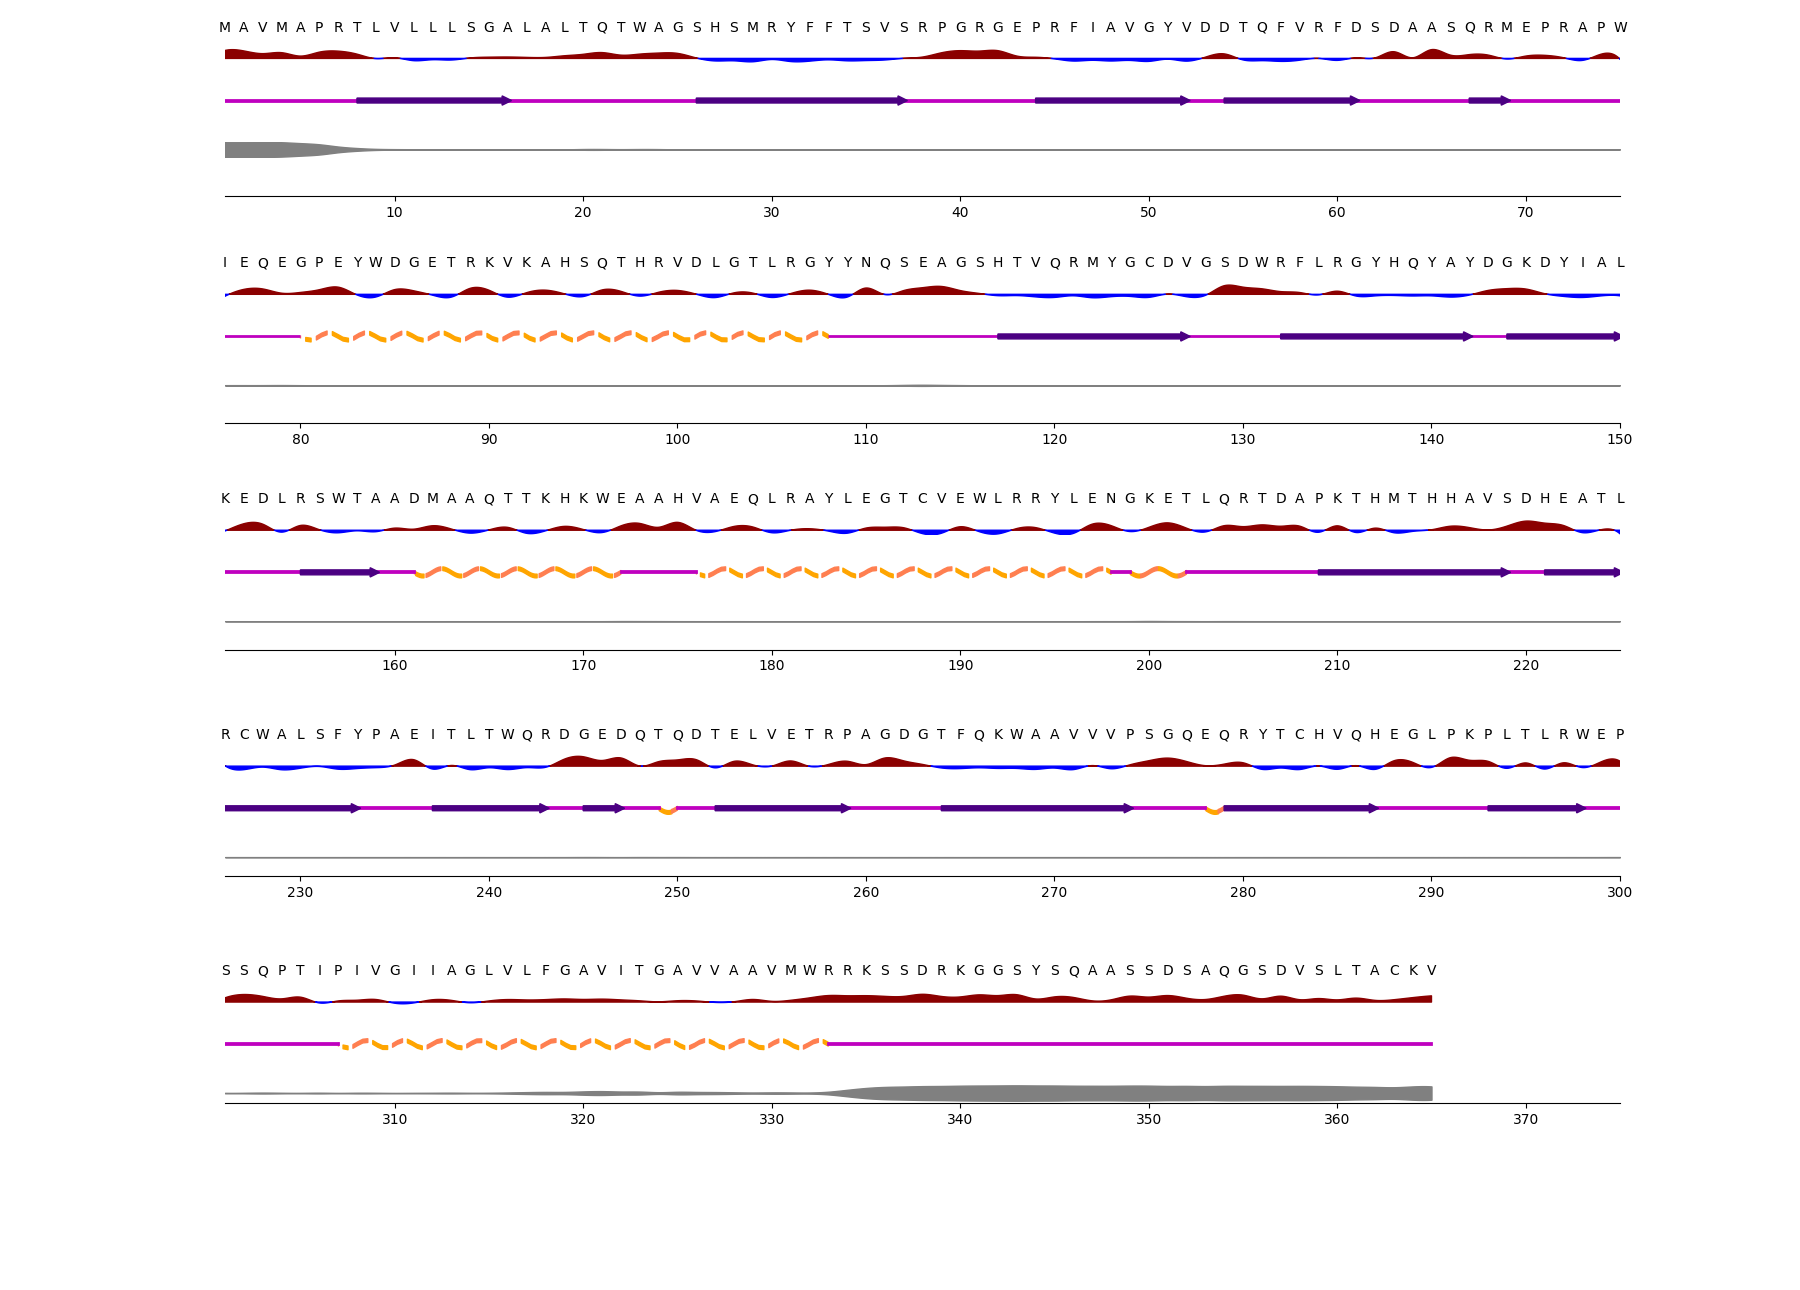

In [ ]:
from IPython.display import Image
Image(filename='/content/biolib_results/query.png')

In [ ]:
import pandas as pd
dfNet = pd.read_csv("/content/biolib_results/results.csv", index_col=0)
dfNet

,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
id,,,,,,,,,,,,,,,,,,,,
>query,M,1,0.779966,174.712477,C,0.000062,0.001516,0.998422,C,0.000021,0.000015,0.000003,0.000167,0.000793,0.000637,0.000453,0.997911,-58.197414,148.727097,0.993361
>query,A,2,0.750342,96.794158,C,0.000384,0.015891,0.983725,C,0.000179,0.000076,0.000021,0.001230,0.008291,0.001861,0.001214,0.987128,-104.818787,143.901505,0.978407
>query,V,3,0.569944,99.170239,C,0.000582,0.048821,0.950597,C,0.000339,0.000166,0.000029,0.005748,0.024559,0.002564,0.001034,0.965561,-102.945236,132.072678,0.959709
>query,M,4,0.634051,142.027390,C,0.000398,0.052215,0.947387,C,0.000198,0.000094,0.000022,0.010307,0.021946,0.004325,0.000794,0.962314,-97.119217,139.918442,0.913765
>query,A,5,0.406504,52.439074,C,0.000558,0.048641,0.950801,C,0.000348,0.000180,0.000036,0.010455,0.023979,0.008900,0.001105,0.954996,-100.375443,142.870224,0.799584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
>query,T,361,0.512016,88.066670,C,0.019910,0.022679,0.957411,C,0.008726,0.009482,0.000175,0.007318,0.014414,0.023457,0.031283,0.905145,-94.108749,23.154285,0.815623
>query,A,362,0.364889,47.070719,C,0.019571,0.043104,0.937324,C,0.006845,0.009015,0.000237,0.018447,0.023079,0.029014,0.016764,0.896598,-89.640495,120.262177,0.779314
>query,C,363,0.406002,67.802341,C,0.011534,0.060718,0.927748,C,0.003724,0.004571,0.000164,0.025280,0.029696,0.014416,0.013135,0.909014,-86.011269,135.764648,0.741839


In [ ]:
print(dfNet.columns.tolist())

[' seq', ' n', ' rsa', ' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder']


In [ ]:
if 'rsa' in dfNet.columns:
    solvent_accessible_sequences = dfNet[dfNet['rsa'] > 0.25]
else:
    print("The 'rsa' column does not exist in the DataFrame.")

The 'rsa' column does not exist in the DataFrame.


In [ ]:
solvent_accessible_sequences = dfNet[dfNet[' rsa'] > 0.25]

In [ ]:
solvent_accessible_sequences.drop([' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder'], axis=1, inplace=True)


<ipython-input-35-47d134766600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_accessible_sequences.drop([' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder'], axis=1, inplace=True)


In [ ]:
solvent_accessible_sequences

,seq,n,rsa
id,,,
>query,M,1,0.779966
>query,A,2,0.750342
>query,V,3,0.569944
>query,M,4,0.634051
>query,A,5,0.406504
...,...,...,...
>query,T,361,0.512016
>query,A,362,0.364889
>query,C,363,0.406002


In [ ]:
positions = solvent_accessible_sequences[' n'].tolist()

In [ ]:
filtered_mismatches = general[general['Position'].isin(positions)]

In [ ]:
filtered_mismatches.reset_index(drop=True, inplace=True)

In [ ]:
filtered_mismatches

,Position,Donor_AA,Recipient1_AA,Recipient2_AA
0,10,V,L,L
1,86,G,Q,Q
2,90,K,N,N
3,100,V,A,E
4,101,D,N,S
5,129,S,P,P
6,131,W,G,G
7,166,T,I,I
8,169,H,R,R


## Immune Epitope Database

In [ ]:
!pip install iedb

In [ ]:
import iedb

In [ ]:
mhcii_res = iedb.query_mhcii_binding(method="nn_align", sequence=donorA1_sequence, allele="HLA-DRB1*01:01", length=15)

In [ ]:
mhcii_res

,allele,seq_num,start,end,length,core_peptide,peptide,ic50,rank,adjusted_rank
0,HLA-DRB1*01:01,1,229,243,15,FYPAEITLT,ALSFYPAEITLTWQR,13.40,4.2,4.20
1,HLA-DRB1*01:01,1,227,241,15,FYPAEITLT,CWALSFYPAEITLTW,14.20,4.5,4.50
2,HLA-DRB1*01:01,1,228,242,15,FYPAEITLT,WALSFYPAEITLTWQ,15.50,5.0,5.00
3,HLA-DRB1*01:01,1,230,244,15,FYPAEITLT,LSFYPAEITLTWQRD,19.70,6.5,6.50
4,HLA-DRB1*01:01,1,315,329,15,FGAVITGAV,LVLFGAVITGAVVAA,20.60,6.9,6.90
...,...,...,...,...,...,...,...,...,...,...
346,HLA-DRB1*01:01,1,241,255,15,DQTQDTELV,WQRDGEDQTQDTELV,13799.60,99.0,99.00
347,HLA-DRB1*01:01,1,238,252,15,WQRDGEDQT,TLTWQRDGEDQTQDT,14534.90,99.0,99.00
348,HLA-DRB1*01:01,1,68,82,15,MEPRAPWIE,RMEPRAPWIEQEGPE,15478.70,99.0,99.00
349,HLA-DRB1*01:01,1,239,253,15,WQRDGEDQT,LTWQRDGEDQTQDTE,16671.80,99.0,99.00


In [ ]:
tcell_res = iedb.query_tcell_epitope(method="smm", sequence=donorA1_sequence, allele="HLA-A*01:01", length=9, proteasome='immuno')

In [ ]:
tcell_res

,allele,seq_num,start,end,length,peptide,proteasome_score,tap_score,mhc_score,processing_score,total_score,ic50_score
0,HLA-A*01:01,1,336,344,9,SSDRKGGSY,1.3248,1.2773,-2.0415,2.6021,0.5605,110.0399
1,HLA-A*01:01,1,75,83,9,WIEQEGPEY,1.5019,1.1878,-3.1486,2.6897,-0.4589,1407.8293
2,HLA-A*01:01,1,115,123,9,GSHTVQRMY,1.4084,1.2889,-3.1865,2.6973,-0.4892,1536.5617
3,HLA-A*01:01,1,23,31,9,WAGSHSMRY,1.2688,1.2140,-3.0126,2.4828,-0.5297,1029.3190
4,HLA-A*01:01,1,225,233,9,LRCWALSFY,1.2614,1.3691,-3.4185,2.6305,-0.7881,2621.5008
...,...,...,...,...,...,...,...,...,...,...,...,...
352,HLA-A*01:01,1,42,50,9,GEPRFIAVG,0.9593,-0.6912,-6.5855,0.2680,-6.3175,3850791.4600
353,HLA-A*01:01,1,145,153,9,KDYIALKED,0.8462,-0.8079,-6.4075,0.0383,-6.3692,2555936.1471
354,HLA-A*01:01,1,79,87,9,EGPEYWDGE,0.6146,-0.9104,-6.1465,-0.2958,-6.4424,1401360.9133
355,HLA-A*01:01,1,255,263,9,VETRPAGDG,0.4902,-0.6322,-6.3115,-0.1419,-6.4535,2049037.9406


## NetMHCIIpan

In [ ]:
!pip install PyNetMHCpan

In [ ]:
!git clone https://github.com/kevinkovalchik/PyNetMHCpan.git

Cloning into 'PyNetMHCpan'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 102 (delta 45), reused 86 (delta 29), pack-reused 0
Receiving objects: 100% (102/102), 17.46 KiB | 5.82 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
cd /content/PyNetMHCpan

/content/PyNetMHCpan


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [ ]:
from PyNetMHCpan import NetMHCpan

In [ ]:
from PyNetMHCpan import NetMHCpan

In [ ]:
h = NetMHCpan.Helper(mhc_class='II',
                     alleles=[R_DRB1_1, R_DRB1_2, R_DRB345_1, R_DRB345_2, R_DQB1_1, R_DQB1_2, R_DQA1_1, R_DQA1_2, R_DPB1_1, R_DPB1_2, R_DPA1_1, R_DPA1_2],
                     n_threads=12)

It looks like there is a problem with the configuration. Please review the following and update as necessary:
The current config settings are as follows:

 [PATHS]
 NetMHCpan = /home/labcaron/Projects/Software/MhcVizPipe/bin/netMHCpan
 NetMHCIIpan = /home/labcaron/Projects/Software/MhcVizPipe/bin/netMHCIIpan

To update the path to the NetMHCpan script type 1 and press enter (any other key to skip): 
To update the path to the NetMHCIIpan script type 2 and press enter (any other key to skip): 


In [ ]:
def extract_peptides(sequence, peptide_length=15):
    peptides = []
    for i in range(len(sequence) - peptide_length + 1):
        peptide = sequence[i:i+peptide_length]
        peptides.append(peptide)
    return peptides

In [ ]:
peptides = extract_peptides(donorA1_sequence)

In [ ]:
h.add_peptides(['N.ENSDESYSEEEEEMPDSD.E',
                'F.EC[+57]NNSESGYLYC[+57]C[+57]GTC[+57]Y.Y',
                'K.AM[+15]IM[+15]C[+57]QGC[+57]GAFC[+57]HDDC[+57]IG.P'])

In [ ]:
fastafile = 'query.fasta'

## Package2

In [ ]:
!pip install epitopepredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.3 MB/s eta 0:00:00
  Created wheel for epitopepredict: filename=epitopepredict-0.5.0-py3-none-any.whl size=5973737 sha256=56cc0b3e2da4a7d4d840975cbee885bbeb84d5e8ce6162b91def7bf53918171b
  Stored in directory: /root/.cache/pip/wheels/e3/d6/36/567730c38eb067fba937ec0b48e2d508d0e171b9a20b7cc598
Successfully built epitopepredict


In [ ]:
import epitopepredict as ep
from epitopepredict import base, sequtils, analysis, plotting

wrote config file /root/.config/epitopepredict/default.conf


In [ ]:
print(base.predictors)

['basicmhc1', 'tepitope', 'netmhciipan', 'netmhcpan', 'mhcflurry', 'iedbmhc1', 'iedbmhc2']


In [ ]:
p = base.get_predictor('netmhciipan')

In [ ]:
from epitopepredict.base import TEpitopePredictor
from epitopepredict.tepitope import get_scores
from epitopepredict.peptutils import create_fragments

In [ ]:
from Bio.Seq import Seq

In [ ]:
donorA1_sequence = Seq(donorA1_sequence)

## Package 3


In [ ]:
!pip install mhctools

In [ ]:
from mhctools import NetMHCIIpan

In [ ]:
predictor = NetMHCIIpan(path_to_netMHCIIpan=r"C:\Users\DELL\Downloads\netMHCIIpan-4.3c.Darwin")
protein = donorA1_sequence

peptides = predictor.generate_peptides(sequence=protein, length=9, cleavage_sites=["B"])
filtered_peptides = [p for p in peptides if is_solvent_accessible_mismatch(p)]

In [ ]:
results = predictor.predict_sequences(filtered_peptides)

for prediction in results:
    print(f"Peptide: {prediction.peptide}, Affinity: {prediction.affinity}")

In [ ]:
!pip install -q mhcflurry
!mhcflurry-downloads --quiet fetch models_class1_presentation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.1 MB/s eta 0:00:00
2024-02-12 22:31:48.167741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 22:31:48.167815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 22:31:48.169922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 22:31:48.183012: I tensorflow/core/platform/cpu_feature_guard.cc:

In [ ]:
import mhcflurry
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

In [ ]:
predictor = mhcflurry.Class1PresentationPredictor.load()
predictor

INFO:root:Loaded 10 class1 pan allele predictors, 14839 allele sequences, 6308 percent rank distributions, and 0 allele specific models: 
INFO:root:Model optimization succeeded
INFO:root:Loaded 8 class1 processing models
INFO:root:Loaded 8 class1 processing models


<Class1PresentationPredictor at 0x793ce49b3130 [mhcflurry 2.1.0] generated on Thu Jun 11 13:37:18 2020>